In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

sns.set()

In [2]:
def redundant(df): #Removing columns with single repetitive value
    redundant_columns = []
    for i in df.columns:
        l = df[i].unique()
        if len(l) ==1:
            redundant_columns.append(i)
    return redundant_columns

In [3]:
returns1= pd.read_csv('C:/Users/Sindhu/Downloads/Returns-Report.csv')
returns2 = pd.read_csv('C:/Users/Sindhu/Downloads/Returns-Report (1).csv')
# Csv files containing the data of completed return orders. 
returns = pd.concat([returns1,returns2],ignore_index=True)
returns.dropna(axis=1,how='all',inplace=True) #Removing columns with all null values.
red_cols = redundant(returns)
red_cols1 = ['Return Approval Date','Return ID','Buyer Name','Replacement Order Item ID']#Removing columns that won't help our model
# ,to learn any pattern in the dataset.
returns.drop(red_cols+red_cols1,axis=1,inplace=True)
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Return Requested Date         152 non-null    object 
 1   Tracking ID                   144 non-null    object 
 2   Order ID                      152 non-null    object 
 3   Order Item ID                 152 non-null    object 
 4   Return Type                   152 non-null    object 
 5   Return Sub Type               152 non-null    object 
 6   Return Status                 152 non-null    object 
 7   SKU                           152 non-null    object 
 8   FSN                           152 non-null    object 
 9   Product                       152 non-null    object 
 10  Return Delivery Promise Date  126 non-null    object 
 11  Picked Up Date                123 non-null    object 
 12  Out For Delivery Date         19 non-null     object 
 13  Compl

In [4]:
returns['Return Status'].value_counts()

Completed           149
Out For Delivery      3
Name: Return Status, dtype: int64

In [5]:
returns.head()

,Return Requested Date,Tracking ID,Order ID,Order Item ID,Return Type,Return Sub Type,Return Status,SKU,FSN,Product,...,Completed Date,Return Reason,Return Sub-reason,Comments,Buyer Pincode,Buyer City,Buyer State,Total Price,Quantity,Vendor Name
0,"5 July, 2021",FMPR0194172925,OD122138342062524000,'12213834206252402,Customer Return,Refund,Completed,Milton/electron 3/2021/12,LBXEU5CT3PTTKT5B,MILTON ELECTRON 3 Containers Lunch Box,...,"11 July, 2021",COLOR STYLE ISSUES,COLOR NOT AS EXPECTED,Color different of items received and small in...,411062,Pimpri Chinchwad,Maharashtra,1234.0,1,Ekart Logistics
1,"30 June, 2021",FMPR0193157224,OD222132952306948000,'22213295230694800,Customer Return,Refund,Completed,Milton/prudent 350/2020/03,BOTFGXGUWKXNYUEC,MILTON PRUDENT-350 Thermosteel Hot & Cold Wate...,...,"11 July, 2021",QUALITY ISSUES,POOR QUALITY,Cap is not fit,560086,Bengaluru,Karnataka,785.0,1,Ekart Logistics
2,"30 June, 2021",FMPR0193935247,OD222156177728578000,'22215617772857800,Customer Return,Replacement,Completed,Milton/prudent 1100/2020/08,BOTFW9BMQG9QPFXV,MILTON PRUDENT 1100ML THERMOSTEEL BOTTLE 1100 ...,...,"11 July, 2021",MISSHIPMENT,DIFFERENT PRODUCT RECEIVED,Issue :Received wrong item .Received bisleri b...,140603,Zirakpur,Punjab,1346.0,1,Ekart Logistics
3,"5 July, 2021",FMPR0194352752,OD122195066830447000,'12219506683044700,Customer Return,Refund,Completed,Milton/prudent 1100/2020/07,BOTFGYJF8GXPMR7R,MILTON PRUDENT 1100ML THERMOSTEEL BOTTLE BLUE ...,...,"11 July, 2021",DAMAGED PRODUCT,DAMAGED PRODUCT RECEIVED,Damaged item,110020,New Delhi,Delhi,1291.0,1,Ekart Logistics
4,"22 June, 2021",FMPR0191508964,OD122068005628272000,'12206800562827200,Customer Return,Replacement,Completed,Lalaonline/milton kns 1800/2020/09,BOTF6HTBCGSMMHKZ,MILTON Kool N Sporty 1800 Blue Insulated Plast...,...,"5 July, 2021",DAMAGED PRODUCT,DAMAGED PRODUCT RECEIVED,Lid of bottle is not ok... it's missing the th...,394210,Surat,Gujarat,409.0,1,Ekart Logistics


In [6]:
spf = pd.read_csv('spf_claims_Edited.csv') #Data having the information about spf claims
spf.head()

,Order ID,Reason
0,OD222076264857425000,Used
1,OD122045749783444000,Damaged
2,OD122016327103531000,Used
3,OD121761949685220000,Wrong/Missing Product
4,OD221731799916820000,Wrong/Missing Product


In [7]:
df = pd.merge(returns,spf,on = 'Order ID',how='left')
df.head()

,Return Requested Date,Tracking ID,Order ID,Order Item ID,Return Type,Return Sub Type,Return Status,SKU,FSN,Product,...,Return Reason,Return Sub-reason,Comments,Buyer Pincode,Buyer City,Buyer State,Total Price,Quantity,Vendor Name,Reason
0,"5 July, 2021",FMPR0194172925,OD122138342062524000,'12213834206252402,Customer Return,Refund,Completed,Milton/electron 3/2021/12,LBXEU5CT3PTTKT5B,MILTON ELECTRON 3 Containers Lunch Box,...,COLOR STYLE ISSUES,COLOR NOT AS EXPECTED,Color different of items received and small in...,411062,Pimpri Chinchwad,Maharashtra,1234.0,1,Ekart Logistics,NaN
1,"30 June, 2021",FMPR0193157224,OD222132952306948000,'22213295230694800,Customer Return,Refund,Completed,Milton/prudent 350/2020/03,BOTFGXGUWKXNYUEC,MILTON PRUDENT-350 Thermosteel Hot & Cold Wate...,...,QUALITY ISSUES,POOR QUALITY,Cap is not fit,560086,Bengaluru,Karnataka,785.0,1,Ekart Logistics,NaN
2,"30 June, 2021",FMPR0193935247,OD222156177728578000,'22215617772857800,Customer Return,Replacement,Completed,Milton/prudent 1100/2020/08,BOTFW9BMQG9QPFXV,MILTON PRUDENT 1100ML THERMOSTEEL BOTTLE 1100 ...,...,MISSHIPMENT,DIFFERENT PRODUCT RECEIVED,Issue :Received wrong item .Received bisleri b...,140603,Zirakpur,Punjab,1346.0,1,Ekart Logistics,NaN
3,"5 July, 2021",FMPR0194352752,OD122195066830447000,'12219506683044700,Customer Return,Refund,Completed,Milton/prudent 1100/2020/07,BOTFGYJF8GXPMR7R,MILTON PRUDENT 1100ML THERMOSTEEL BOTTLE BLUE ...,...,DAMAGED PRODUCT,DAMAGED PRODUCT RECEIVED,Damaged item,110020,New Delhi,Delhi,1291.0,1,Ekart Logistics,NaN
4,"22 June, 2021",FMPR0191508964,OD122068005628272000,'12206800562827200,Customer Return,Replacement,Completed,Lalaonline/milton kns 1800/2020/09,BOTF6HTBCGSMMHKZ,MILTON Kool N Sporty 1800 Blue Insulated Plast...,...,DAMAGED PRODUCT,DAMAGED PRODUCT RECEIVED,Lid of bottle is not ok... it's missing the th...,394210,Surat,Gujarat,409.0,1,Ekart Logistics,NaN


In [8]:
rem = ['Order ID','Return Status','Return Reason','Return Sub-reason','Comments','Buyer City','Buyer State']
# The Order ID column is dropped because Order Item ID serves the same purpose , Return Status is removed because almost all of its 
#values are same, Customer feedback is removed because in some cases it may reveal the ground truth and last two columns are removed 
#because all the information about location of Buyer is present in Buyer's Pincode
df.drop(rem,axis=1,inplace=True)

In [9]:
df.loc[df['Order Item ID']=="'12102362756866500",'Reason']=np.nan
df.loc[df['Order Item ID']=="'12162441871712201",'Reason']=np.nan
# As one Order Id can have multiple Order Item IDs, for a order of multiple items/replcaement.This is a correction for Order Item
# IDs on which spf was not claimed.

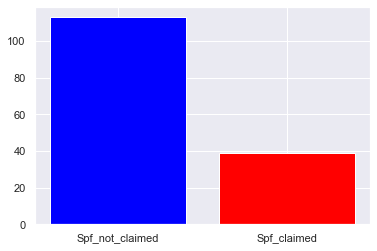

In [10]:
x = ['Spf_not_claimed','Spf_claimed']
y = [df.Reason.isnull().sum(),(~df.Reason.isnull()).sum()]
plt.bar(x,y,color=['blue','red'])
plt.show()

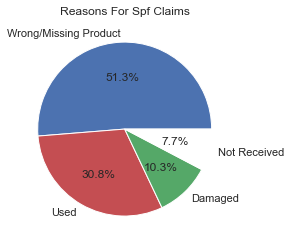

In [11]:
info = df.Reason.value_counts()
labels = info.index
perc = info.values
plt.pie(perc,labels=labels,autopct='%.1f%%',colors=['b','r','g','w'])
plt.title('Reasons For Spf Claims')
plt.show()

In [12]:
df['Region'] = df['Buyer Pincode'].apply(lambda X : X//100000)
df['Sub-region'] = df['Buyer Pincode'].apply(lambda X : int(str(X)[1]))
df['Sorting District'] = df['Buyer Pincode'].apply(lambda X : int(str(X)[2]))
df['Post Office'] = df['Buyer Pincode'].apply(lambda X : int(str(X)[3:]))
df.drop(['Buyer Pincode','Return Delivery Promise Date','Picked Up Date','Out For Delivery Date'],axis=1,inplace=True)
# Removing some more redundant columns

In [13]:
df.Reason.fillna('0',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Return Requested Date  152 non-null    object 
 1   Tracking ID            144 non-null    object 
 2   Order Item ID          152 non-null    object 
 3   Return Type            152 non-null    object 
 4   Return Sub Type        152 non-null    object 
 5   SKU                    152 non-null    object 
 6   FSN                    152 non-null    object 
 7   Product                152 non-null    object 
 8   Completed Date         152 non-null    object 
 9   Total Price            152 non-null    float64
 10  Quantity               152 non-null    int64  
 11  Vendor Name            144 non-null    object 
 12  Reason                 152 non-null    object 
 13  Region                 152 non-null    int64  
 14  Sub-region             152 non-null    int64  
 15  Sortin

In [14]:
df.head()

,Return Requested Date,Tracking ID,Order Item ID,Return Type,Return Sub Type,SKU,FSN,Product,Completed Date,Total Price,Quantity,Vendor Name,Reason,Region,Sub-region,Sorting District,Post Office
0,"5 July, 2021",FMPR0194172925,'12213834206252402,Customer Return,Refund,Milton/electron 3/2021/12,LBXEU5CT3PTTKT5B,MILTON ELECTRON 3 Containers Lunch Box,"11 July, 2021",1234.0,1,Ekart Logistics,0,4,1,1,62
1,"30 June, 2021",FMPR0193157224,'22213295230694800,Customer Return,Refund,Milton/prudent 350/2020/03,BOTFGXGUWKXNYUEC,MILTON PRUDENT-350 Thermosteel Hot & Cold Wate...,"11 July, 2021",785.0,1,Ekart Logistics,0,5,6,0,86
2,"30 June, 2021",FMPR0193935247,'22215617772857800,Customer Return,Replacement,Milton/prudent 1100/2020/08,BOTFW9BMQG9QPFXV,MILTON PRUDENT 1100ML THERMOSTEEL BOTTLE 1100 ...,"11 July, 2021",1346.0,1,Ekart Logistics,0,1,4,0,603
3,"5 July, 2021",FMPR0194352752,'12219506683044700,Customer Return,Refund,Milton/prudent 1100/2020/07,BOTFGYJF8GXPMR7R,MILTON PRUDENT 1100ML THERMOSTEEL BOTTLE BLUE ...,"11 July, 2021",1291.0,1,Ekart Logistics,0,1,1,0,20
4,"22 June, 2021",FMPR0191508964,'12206800562827200,Customer Return,Replacement,Lalaonline/milton kns 1800/2020/09,BOTF6HTBCGSMMHKZ,MILTON Kool N Sporty 1800 Blue Insulated Plast...,"5 July, 2021",409.0,1,Ekart Logistics,0,3,9,4,210


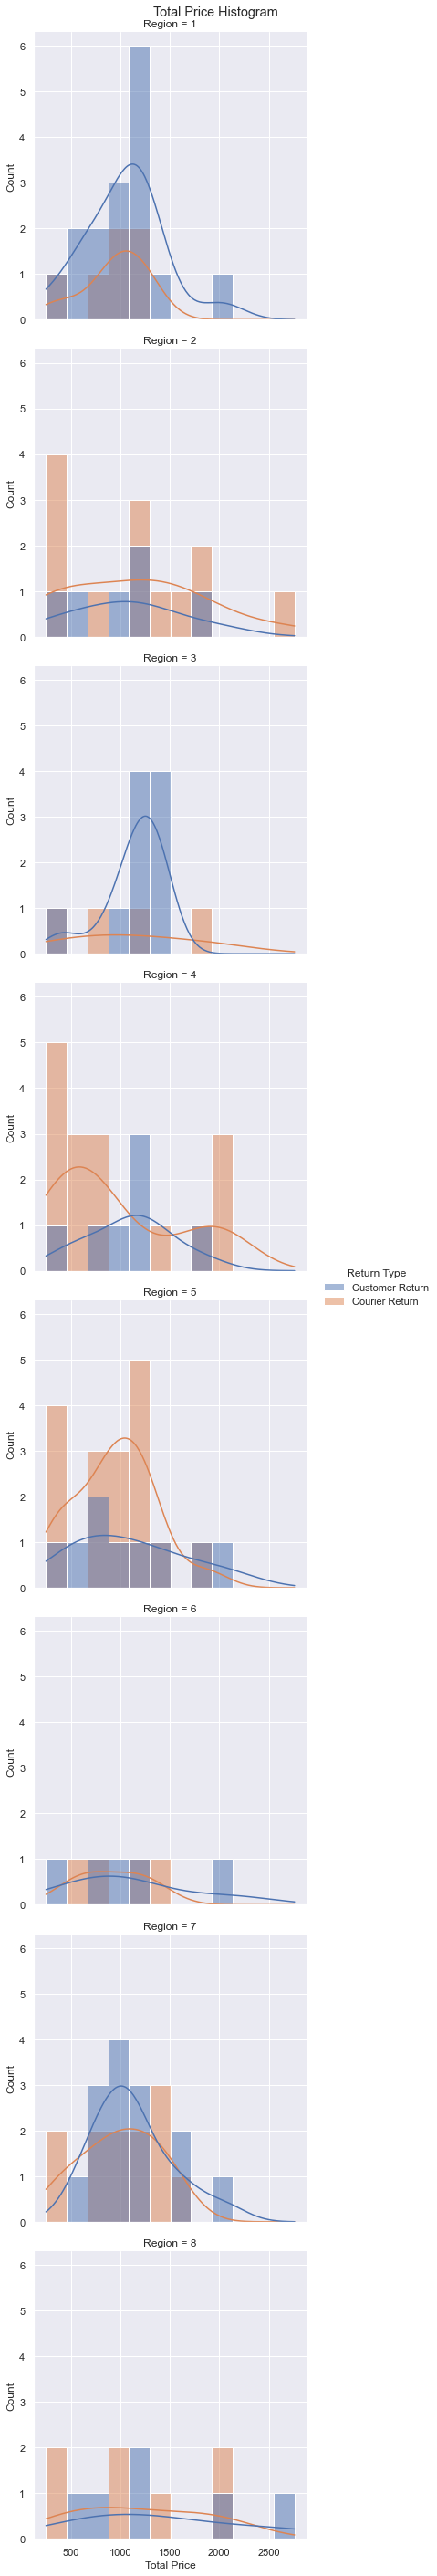

In [15]:
f = sns.displot(x = 'Total Price',data=df,kde=True,hue='Return Type',row='Region')
f.fig.subplots_adjust(top=0.97)
f.fig.suptitle('Total Price Histogram')
plt.show()

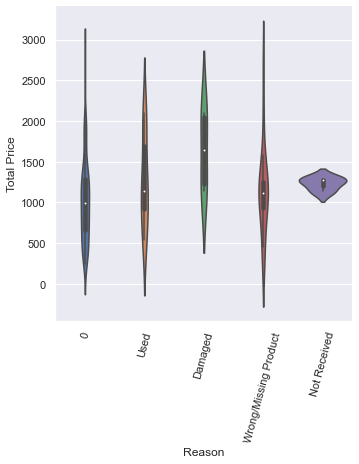

In [16]:
sns.catplot(x='Reason',y='Total Price',data=df,kind='violin')
plt.xticks(rotation=75)
plt.show()

In [17]:
def c_plotter(x,df,hue):
    sns.countplot(x=x,data=df,hue=hue)
    plt.xticks(rotation=75)
    plt.show()

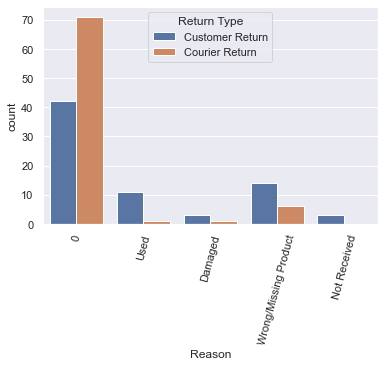

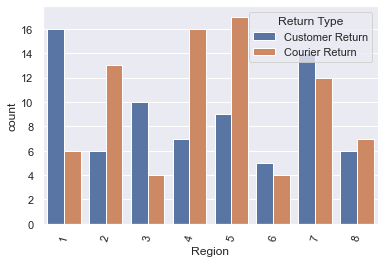

In [18]:
c_plotter('Reason',df,'Return Type')
c_plotter('Region',df,'Return Type')

In [19]:
def date_org(df,column_name,j): #To split Date columns into Day , Month and Year
    df[j + '_Day'] = df[column_name].apply(lambda X: int(X[0]))
    df[j+ '_Yr'] = df[column_name].apply(lambda X : int(X[-4:]))
    pattern = re.compile(r'[a-zA-Z]+')
    df[j+'_Month'] = df[column_name].apply(lambda X: pattern.search(X).group())
    return df
df = date_org(df,'Return Requested Date','Ret_Req')
df = date_org(df,'Completed Date','Comp')

In [20]:
rem = ['Return Requested Date','Tracking ID','Order Item ID','Completed Date'] #Tracking ID and Order Item Id are removed because 
#They provide no extra information.
df_m = df.drop(rem,axis=1)
df_m.head()

,Return Type,Return Sub Type,SKU,FSN,Product,Total Price,Quantity,Vendor Name,Reason,Region,Sub-region,Sorting District,Post Office,Ret_Req_Day,Ret_Req_Yr,Ret_Req_Month,Comp_Day,Comp_Yr,Comp_Month
0,Customer Return,Refund,Milton/electron 3/2021/12,LBXEU5CT3PTTKT5B,MILTON ELECTRON 3 Containers Lunch Box,1234.0,1,Ekart Logistics,0,4,1,1,62,5,2021,July,1,2021,July
1,Customer Return,Refund,Milton/prudent 350/2020/03,BOTFGXGUWKXNYUEC,MILTON PRUDENT-350 Thermosteel Hot & Cold Wate...,785.0,1,Ekart Logistics,0,5,6,0,86,3,2021,June,1,2021,July
2,Customer Return,Replacement,Milton/prudent 1100/2020/08,BOTFW9BMQG9QPFXV,MILTON PRUDENT 1100ML THERMOSTEEL BOTTLE 1100 ...,1346.0,1,Ekart Logistics,0,1,4,0,603,3,2021,June,1,2021,July
3,Customer Return,Refund,Milton/prudent 1100/2020/07,BOTFGYJF8GXPMR7R,MILTON PRUDENT 1100ML THERMOSTEEL BOTTLE BLUE ...,1291.0,1,Ekart Logistics,0,1,1,0,20,5,2021,July,1,2021,July
4,Customer Return,Replacement,Lalaonline/milton kns 1800/2020/09,BOTF6HTBCGSMMHKZ,MILTON Kool N Sporty 1800 Blue Insulated Plast...,409.0,1,Ekart Logistics,0,3,9,4,210,2,2021,June,5,2021,July


In [21]:
df_m['Brand'] = df_m['Product'].str.split(expand=True)[0] #Brand of each Product
df_m['Type'] = df_m['FSN'].apply(lambda X: X[:3]) #Type of each product like bottle , diaper rtc.
df_m['FSN_Frequency'] = df_m.groupby('FSN')['FSN'].transform('count') #Grouping each return with their product level listing.

In [22]:
df_m.drop(['SKU','FSN','Product','Quantity'],axis=1,inplace=True) #Dropping Quantity column because almost every value of quantity is 1.
df_m.head()

,Return Type,Return Sub Type,Total Price,Vendor Name,Reason,Region,Sub-region,Sorting District,Post Office,Ret_Req_Day,Ret_Req_Yr,Ret_Req_Month,Comp_Day,Comp_Yr,Comp_Month,Brand,Type,FSN_Frequency
0,Customer Return,Refund,1234.0,Ekart Logistics,0,4,1,1,62,5,2021,July,1,2021,July,MILTON,LBX,1
1,Customer Return,Refund,785.0,Ekart Logistics,0,5,6,0,86,3,2021,June,1,2021,July,MILTON,BOT,3
2,Customer Return,Replacement,1346.0,Ekart Logistics,0,1,4,0,603,3,2021,June,1,2021,July,MILTON,BOT,5
3,Customer Return,Refund,1291.0,Ekart Logistics,0,1,1,0,20,5,2021,July,1,2021,July,MILTON,BOT,4
4,Customer Return,Replacement,409.0,Ekart Logistics,0,3,9,4,210,2,2021,June,5,2021,July,MILTON,BOT,5


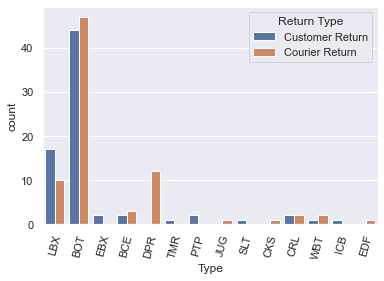

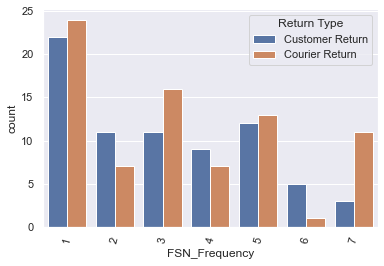

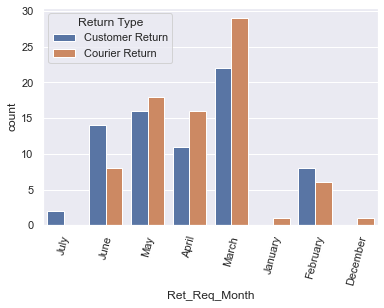

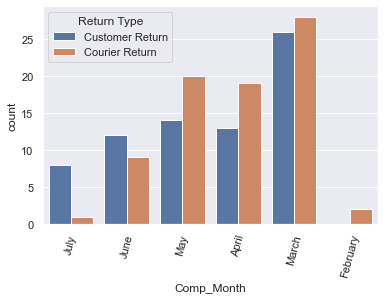

In [23]:
c_plotter('Type',df_m,'Return Type')
c_plotter('FSN_Frequency',df_m,'Return Type')
c_plotter('Ret_Req_Month',df_m,'Return Type')
c_plotter('Comp_Month',df_m,'Return Type')

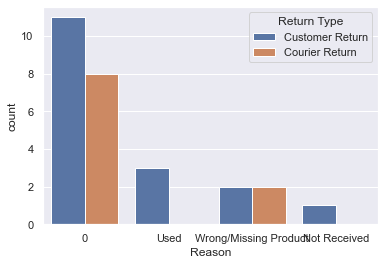

In [24]:
#Plotting a graph for Lunchboxes as they have the highest Customer return ratio.
sns.countplot(x='Reason',data=df_m[df_m['Type']=='LBX'],hue='Return Type')
plt.show()

In [25]:
def cleanser(s):
    pattern = re.compile(r'[a-zA-Z]+')
    try:
        return pattern.match(s).group()
    except:
        return s
df_m['Vendor Name'] = df_m['Vendor Name'].apply(cleanser) #Removing the Cod/Reverse tags in Vendor Names

In [26]:
df_m['Vendor Name'].replace({'Delhivery':'delhivery','Ecom':'ecom',np.nan:'-'},inplace=True) #Correction of Vendor Names and 
#replacing null values with '-'
df_m['Reason'].replace({'Not Received':'Wrong/Missing/Not Received','Wrong/Missing Product':'Wrong/Missing/Not Received',
                       'Damaged':'Damaged/Used','Used':'Damaged/Used'},inplace=True) #Grouping target column in three classes -
#'0' :spf was not  claimed ,'Damaged/Used' and  'Wrong/Missing/Not Received'

In [27]:
df_m['Reason'].replace({'Wrong/Missing/Not Received':'0'},inplace=True)
df_m.Reason.value_counts()

0               136
Damaged/Used     16
Name: Reason, dtype: int64

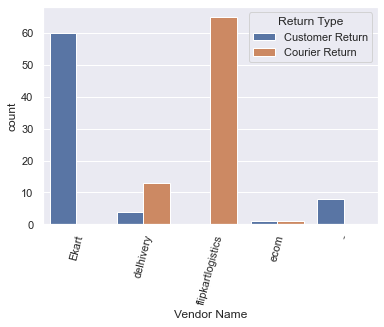

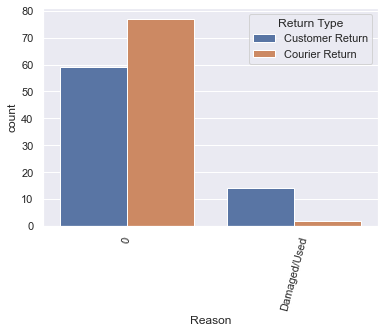

In [28]:
c_plotter('Vendor Name',df_m,'Return Type')
c_plotter('Reason',df_m,'Return Type')

In [29]:
Non_Numeric_Features = ['Return Type','Return Sub Type','Vendor Name','Reason','Brand','Type','Ret_Req_Month']
L = LabelEncoder()
for f in Non_Numeric_Features:
    df_m[f] = L.fit_transform(df_m[f])
df_m['Comp_Month'] = L.transform(df_m['Comp_Month'])
df_m.head()

,Return Type,Return Sub Type,Total Price,Vendor Name,Reason,Region,Sub-region,Sorting District,Post Office,Ret_Req_Day,Ret_Req_Yr,Ret_Req_Month,Comp_Day,Comp_Yr,Comp_Month,Brand,Type,FSN_Frequency
0,1,0,1234.0,1,0,4,1,1,62,5,2021,4,1,2021,4,1,9,1
1,1,0,785.0,1,0,5,6,0,86,3,2021,5,1,2021,4,1,1,3
2,1,1,1346.0,1,0,1,4,0,603,3,2021,5,1,2021,4,1,1,5
3,1,0,1291.0,1,0,1,1,0,20,5,2021,4,1,2021,4,1,1,4
4,1,1,409.0,1,0,3,9,4,210,2,2021,5,5,2021,4,1,1,5


In [30]:
df_m.drop(['Ret_Req_Yr','Comp_Yr'],inplace=True,axis=1)

In [31]:
df_m.corr()

,Return Type,Return Sub Type,Total Price,Vendor Name,Reason,Region,Sub-region,Sorting District,Post Office,Ret_Req_Day,Ret_Req_Month,Comp_Day,Comp_Month,Brand,Type,FSN_Frequency
Return Type,1.000000,0.304564,0.098252,-0.906017,0.270998,-0.069530,-0.103269,-0.110588,-0.090614,0.038236,0.024344,-0.019764,0.033158,-0.139069,0.115197,-0.062876
Return Sub Type,0.304564,1.000000,-0.009034,-0.254050,0.058578,-0.080371,-0.025666,0.007282,0.056661,-0.055284,-0.132405,0.041056,-0.036322,-0.086007,-0.109498,-0.078858
Total Price,0.098252,-0.009034,1.000000,-0.117860,0.194862,0.058137,-0.011000,-0.075966,-0.002746,0.000672,0.210423,-0.036851,0.100126,0.093731,-0.201273,-0.030065
Vendor Name,-0.906017,-0.254050,-0.117860,1.000000,-0.244558,0.109187,0.093320,0.121044,0.130458,-0.015646,-0.044905,0.011213,-0.099616,0.120324,-0.120146,0.029192
Reason,0.270998,0.058578,0.194862,-0.244558,1.000000,0.077131,-0.032319,-0.059443,-0.060029,-0.036640,-0.008881,0.078974,-0.095526,-0.005038,-0.062890,0.009162
Region,-0.069530,-0.080371,0.058137,0.109187,0.077131,1.000000,-0.006677,0.169328,0.076874,0.083117,0.007259,-0.073385,0.146448,-0.025223,0.010102,0.008815
Sub-region,-0.103269,-0.025666,-0.011000,0.093320,-0.032319,-0.006677,1.000000,0.208223,-0.024908,0.039544,0.029244,0.032823,0.034482,-0.081428,0.047850,-0.027175
Sorting District,-0.110588,0.007282,-0.075966,0.121044,-0.059443,0.169328,0.208223,1.000000,0.199862,-0.084393,-0.078614,0.024303,0.107981,0.080080,-0.066069,0.087396
Post Office,-0.090614,0.056661,-0.002746,0.130458,-0.060029,0.076874,-0.024908,0.199862,1.000000,-0.027554,-0.052816,0.055218,-0.090845,0.039431,-0.032590,0.127513
Ret_Req_Day,0.038236,-0.055284,0.000672,-0.015646,-0.036640,0.083117,0.039544,-0.084393,-0.027554,1.000000,0.129729,0.124774,0.110835,0.139363,0.046001,-0.139672


In [32]:
df_m.drop(['Post Office','Ret_Req_Day','Sub-region','Comp_Day'],inplace=True,axis=1)

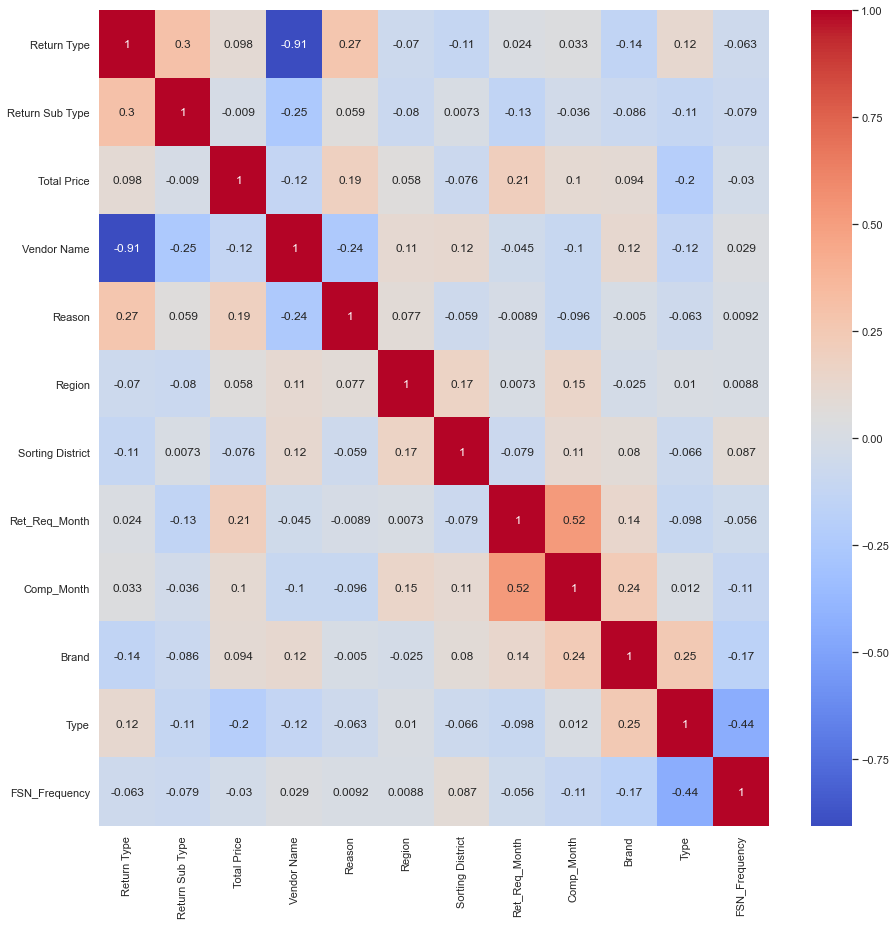

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(df_m.corr(),annot=True,cmap='coolwarm')
plt.show()

In [34]:
y = df_m.Reason.values
x = df_m.drop('Reason',axis=1).values

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y)

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[34,  0],
       [ 3,  1]], dtype=int64)

In [38]:
y_train_pred = clf.predict(x_train)

In [39]:
confusion_matrix(y_train,y_train_pred)

array([[102,   0],
       [  0,  12]], dtype=int64)